# Overall Stargal Stats

Preliminary work for star-gal separation. Performs statistics on lephare outputs carried on two synthetic magnitude libraries (one composed of star SED, another of galaxies SEDs).

SPLIT add two columns to LePHARE:
 - pdz_flag: describes the quality of the computed redshift
 - s-type: the most likely type of star (OBAFGKM) if the observed source was a star


In [1]:
### Libraries ###
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from lephare import statsplot as lsp; reload(lsp)
# %matplotlib widget
%matplotlib inline

LEPHAREDIR is being set to the default cache directory:
/home/hallouin/.cache/lephare/data
More than 1Gb may be written there.
LEPHAREWORK is being set to the default cache directory:
/home/hallouin/.cache/lephare/work
Default work cache is already linked. 
This is linked to the run directory:
/home/hallouin/.cache/lephare/runs/20251013T115331


## Tests on DC2

In [2]:
### Generate pandas df from output catalog ###
base_dir = os.path.abspath(os.path.join(os.getcwd(), '../..')) #change to your lephare base_dir
CAT_OUT = os.path.join(base_dir, 'training_stats/simulation_catalogs/star_gal/dp02_dc2_62_BT_LSST_full.out')
photoz_dc2 = lsp.lephare_to_pandas(CAT_OUT)
### Clean error values
photoz_dc2 = photoz_dc2[photoz_dc2['Z_BEST'] != -99.9]
print(list(photoz_dc2.columns.values))
photoz_dc2

['IDENT', 'Z_BEST', 'Z_MED', 'Z_MODE', 'CHI_BEST', 'MOD_BEST', 'SCALE_BEST', 'NBAND_USED', 'Z_SEC', 'CHI_SEC', 'MOD_STAR', 'CHI_STAR', 'MAG_OBS0', 'MAG_OBS1', 'MAG_OBS2', 'MAG_OBS3', 'MAG_OBS4', 'MAG_OBS5', 'ERR_MAG_OBS0', 'ERR_MAG_OBS1', 'ERR_MAG_OBS2', 'ERR_MAG_OBS3', 'ERR_MAG_OBS4', 'ERR_MAG_OBS5', 'ZSPEC']


,IDENT,Z_BEST,Z_MED,Z_MODE,CHI_BEST,MOD_BEST,SCALE_BEST,NBAND_USED,Z_SEC,CHI_SEC,...,MAG_OBS3,MAG_OBS4,MAG_OBS5,ERR_MAG_OBS0,ERR_MAG_OBS1,ERR_MAG_OBS2,ERR_MAG_OBS3,ERR_MAG_OBS4,ERR_MAG_OBS5,ZSPEC
0,1651413688361421449,0.59310,0.9048,0.2075,0.710939,82,0.010695,6,1.60,1.337700e+00,...,25.452,25.985,24.877,0.743,0.249,0.297,0.585,1.547,2.725,0.00000
1,1651413688361451863,0.02050,0.0841,0.0873,11.403300,1,0.000018,6,1.89,1.444080e+01,...,24.611,24.224,24.009,0.303,0.108,0.131,0.256,0.647,1.144,0.00000
2,1651413688361451723,0.07490,1.2332,0.0744,15.663700,99,0.000023,6,1.39,1.929380e+01,...,26.706,26.399,25.543,0.380,0.125,0.153,0.287,0.821,1.714,1.58383
3,1651413688361451008,0.02454,1.3753,1.4344,8.139960,97,0.000002,6,1.43,8.503740e+00,...,27.495,25.900,25.414,0.476,0.159,0.197,0.362,1.029,2.068,1.57419
4,1651413688361450766,0.10620,0.0869,0.0914,11.011100,41,0.000192,6,-99.90,1.000000e+09,...,25.918,26.159,26.046,0.413,0.140,0.167,0.320,0.841,1.637,1.40663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1651360911803315946,1.12900,1.1175,1.1231,21.706000,96,0.180581,6,-99.90,1.000000e+09,...,23.777,23.467,23.167,0.041,0.012,0.015,0.026,0.079,0.151,1.26376
99996,1651360911803315959,1.66800,1.2896,1.6676,1.407090,19,10.663800,6,-99.90,1.000000e+09,...,23.516,22.897,22.403,0.060,0.020,0.024,0.044,0.128,0.235,1.26990
99997,1651360911803316145,1.02100,0.9420,0.4804,0.249515,17,0.130013,6,-99.90,1.000000e+09,...,26.098,24.835,24.376,1.426,0.455,0.552,1.002,3.062,5.861,1.27025
99998,1651360911803316146,0.81790,0.9952,0.8220,1.358910,82,0.066568,6,-99.90,1.000000e+09,...,24.475,24.281,24.290,0.246,0.083,0.100,0.187,0.531,0.934,0.82813


In [15]:
### error observed mag bining
photoz_dc2_errmag0001 = photoz_dc2[photoz_dc2['ERR_MAG_OBS1']<=0.01]
photoz_dc2_errmag001 = photoz_dc2[(photoz_dc2['ERR_MAG_OBS1']>0.01) & (photoz_dc2['ERR_MAG_OBS1']<=0.1)]
photoz_dc2_errmag01 = photoz_dc2[(photoz_dc2['ERR_MAG_OBS1']>0.1)]# & (photoz_dc2['ERR_MAG_OBS1']<=1)]
#photoz_dc2_errmag1 = photoz_dc2[(photoz_dc2['ERR_MAG_OBS1']>1)]

### observed mag bining
photoz_dc2_mag20 = photoz_dc2[photoz_dc2['MAG_OBS1']<=20]
photoz_dc2_mag23 = photoz_dc2[(photoz_dc2['MAG_OBS1']>20) & (photoz_dc2['MAG_OBS1']<=23)]
photoz_dc2_mag26 = photoz_dc2[(photoz_dc2['MAG_OBS1']>23) & (photoz_dc2['MAG_OBS1']<=26)]
photoz_dc2_mag27 = photoz_dc2[(photoz_dc2['MAG_OBS1']>26)]

### only stars
photoz_dc2_stars = photoz_dc2[photoz_dc2['ZSPEC']==0]

### only gal
photoz_dc2_gal = photoz_dc2[photoz_dc2['ZSPEC']>0]

In [16]:
photoz_dc2_magbin = (photoz_dc2_mag27, photoz_dc2_mag26, photoz_dc2_mag23, photoz_dc2_mag20)
photoz_dc2_magbin_labels = ['Gmag > 26', 'Gmag < 26', 'Gmag < 23', 'Gmag < 20']
photoz_dc2_emagbin = (photoz_dc2_errmag01, photoz_dc2_errmag001, photoz_dc2_errmag0001)
photoz_dc2_emagbin_labels = ['Gemag > 0.1', 'Gemag < 0.1', 'Gemag < 0.01']


zz_plot

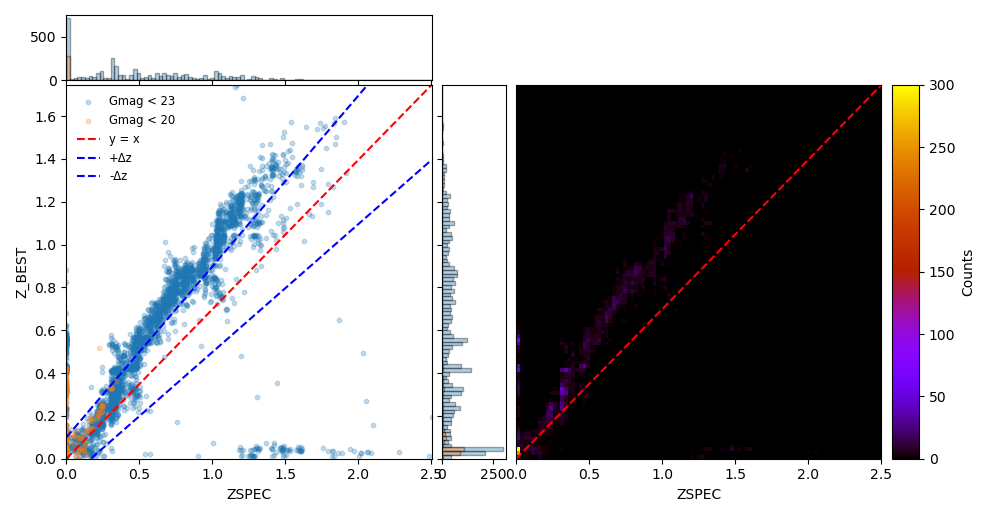

In [17]:
lsp.scatter_vs_hist2D(data=photoz_dc2_magbin[2:], cmaps='gnuplot', deltaz=0.1, labels=photoz_dc2_magbin_labels[2:], xlabel='ZSPEC', ylabel='Z_BEST')
# lsp.scatter_vs_hist2D(data=photoz_dc2_stars, cmaps='gnuplot', deltaz=0.1, xlabel='ZSPEC', ylabel='Z_BEST')

Chi2 distribution, pit and qq-plot

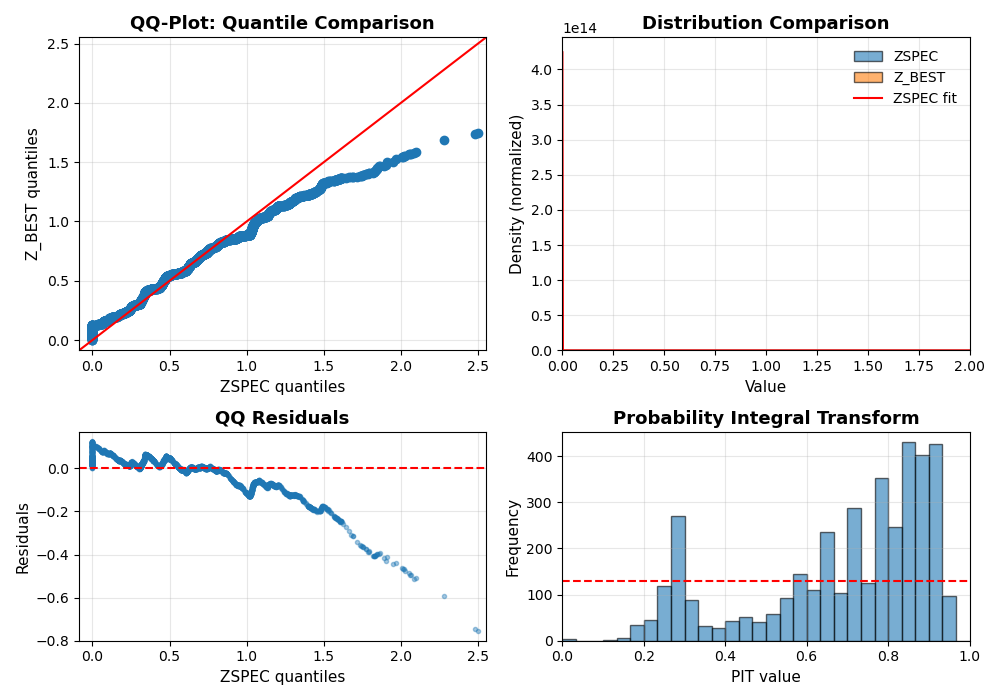

In [18]:
lsp.pit_qqplot(data = photoz_dc2_magbin[2])

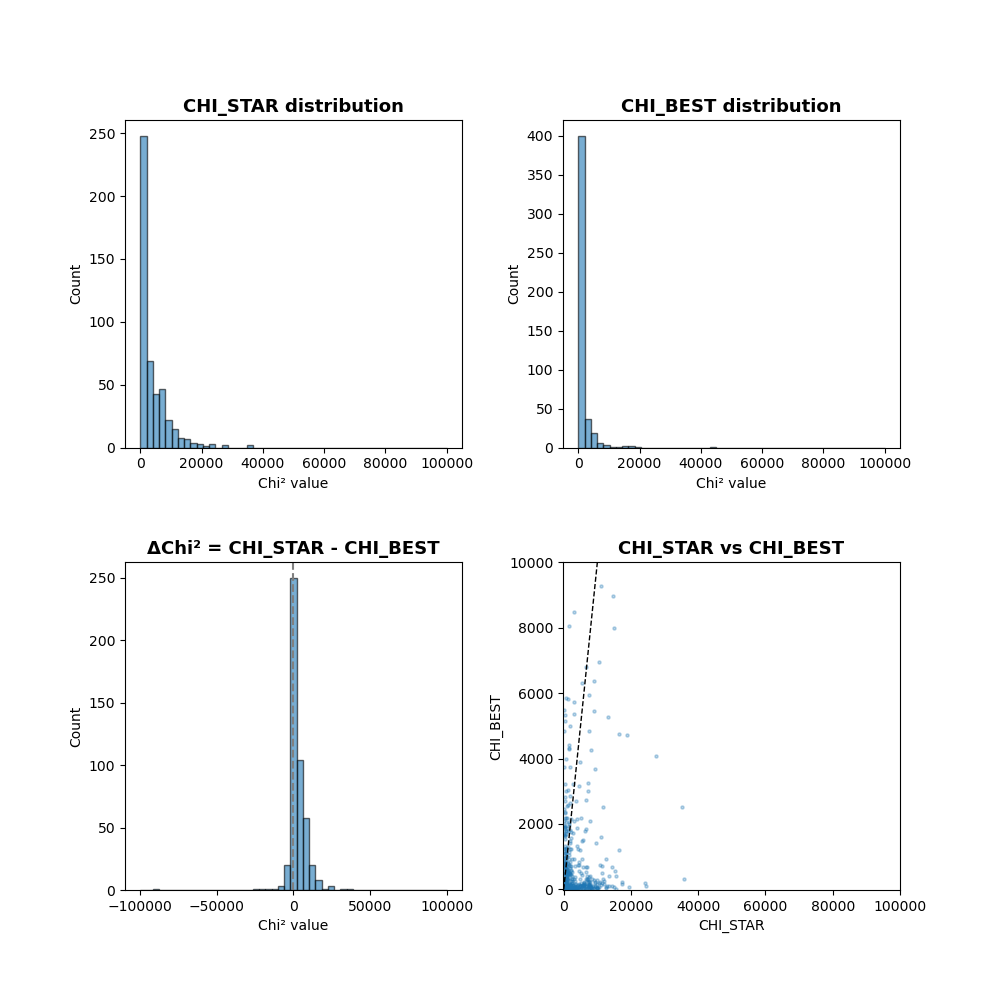

In [28]:
%matplotlib widget
###stars 

lsp.chi_stats(data = photoz_dc2_gal[(photoz_dc2_gal['ERR_MAG_OBS0']<0.01)], mask_min=-100000, mask_max=100000, bins=50, scatter_xlim=(-200, 100000), scatter_ylim=(-20, 10000))

$\Delta\chi$ analysis

In [19]:
delta = photoz_dc1['CHI_STAR']-photoz_dc1['CHI_BEST']
delta = delta[photoz_dc1['ERR_MAG_OBS0']<=0.1]

In [ ]:
print("n(Delta>0) / n = ", len(delta[delta>0])/len(delta))

In [ ]:
lsp.more_chi_stats(data = photoz_dc1, mask_min=-100, mask_max=300, bins=100)

In [ ]:
plt.figure()
delta_chi=photoz_dc1['CHI_STAR'] - photoz_dc1['CHI_BEST']
hist_range = (-1000,1000)
plt.hist(delta_chi, bins=100, alpha=0.7, edgecolor='black', color='purple', range=hist_range)
plt.axvline(0, color='gray', linestyle='--')
plt.show()

flag VS stype

In [ ]:
###Flag and type distribution

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(zphota["PDZ_FLAG"][zphota["PDZ_FLAG"]>=0], bins=100, alpha=0.7, edgecolor='black')#, density=True)#, log=True)
plt.title("PDZ flag distribution")
plt.subplot(122)
plt.title("S-type distribution")
plt.hist(zphota["S_TYPE"], bins=100, alpha=0.7, edgecolor='black', color='orange')#, density=True)#, log=True)

# plt.ylim(0,0.010)
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
plt.rcParams.update({'font.size': 6})
contingency = pd.crosstab(zphota["S_TYPE"], zphota["PDZ_FLAG"])

# Plot avec seaborn
plt.figure(figsize=(18,16))
sns.heatmap(contingency, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 6.5})
plt.title("Distribution des flags par type d'étoile")
plt.ylabel("Type d'étoile")
plt.xlabel("Flag")
plt.show()


In [ ]:
plt.figure(figsize=(15,13))

sns.stripplot(x=zphota["CHI_STAR"]-zphota["CHI_BEST"], y=zphota["S_TYPE"], jitter=True, size=6)
plt.title("DeltaChi distribution as a function of source-type")
plt.ylabel("Type d'étoile")
plt.xlabel("Delta Chi =  Chi_star - Chi_best")
plt.xlim(-1e4,1e4)
plt.show()

In [ ]:
###Flag and type distribution

plt.figure(figsize=(4, 4))
mask=(zphota["CHI_STAR"]<1e4) & (zphota["CHI_BEST"]<1e4)
plt.hist(zphota["CHI_STAR"] - zphota["CHI_BEST"], bins=1000000, alpha=0.7, edgecolor='black')#, density=True)#, log=True)
plt.title("Delta Chi dist")


# plt.ylim(0,0.010)
plt.legend()
plt.show()

In [ ]:
### Generate pandas df from output catalog ###
base_dir = os.path.abspath(os.path.join(os.getcwd(), '../..')) #change to your lephare base_dir
CAT_OUT = os.path.join(base_dir, 'training_stats/simulation_catalogs/star_gal/DESstars_Buzzard_PICKLES_DES_kk_typed.out')


photoz_des = lsp.lephare_to_pandas(CAT_OUT)
### Clean error values
photoz_des = photoz_des[photoz_des['Z_BEST'] != -99.9]
print(list(photoz_des.columns.values))
photoz_des